# Preliminary Model Results for SMART
12/1/2024

Group 11

Project Manager: Charles Annis

Data Researcher: Owen Koonce

Data Analyst/Modeler: Oscar Luo

## Introduction
This project is to identify an actionable strategy for SMART to optimize sustainability in the United Kingdom. By using predictive modeling, we aim to project emissions trends, analyze the impact of transitioning to other transportation options, and evaluate a potentential policy change.

## Brief Data Summary


### Transport Sector CO2 Emissions 2000-2030

This dataset tracks and predicts emissions across various transport modes, supporting policymakers and researchers in monitoring progress toward climate goals. Collected through international energy and transportation reports, the data combines measured and modeled estimates for different modes (e.g., aviation, road freight, rail) and spans from 2000 to 2030. Each row represents CO2 emissions (in gigatonnes) for a specific mode in a given year, with the target variable being the quantified emissions. Predictor variables include the year and transport mode to analyze trends over time. Data cleaning may involve normalization, handling missing values, particularly for future projections, and filtering specific years or modes based on research needs.


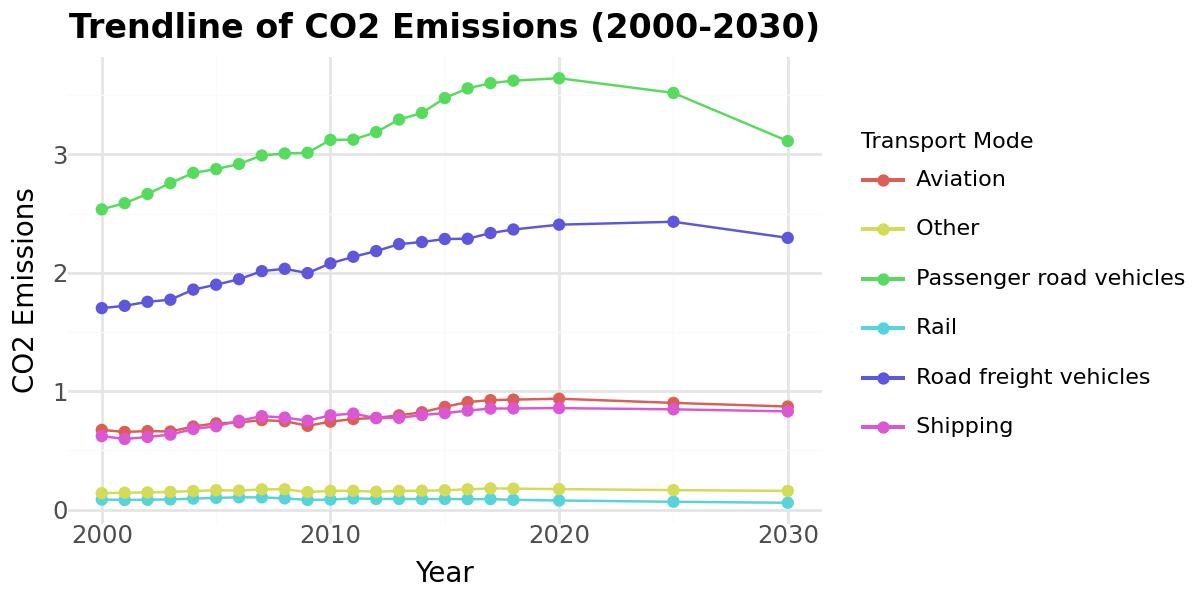

In [51]:
import pandas as pd
from plotnine import *

# Load the data
transport = pd.read_csv("/content/emission_predictions.csv")

# Create the plot
(
    ggplot(df_long, aes(x='Year', y='CO2 Emissions', color='Transport Mode'))
    + geom_line()
    + geom_point()
    + labs(
        title='Trendline of CO2 Emissions (2000-2030)',
        x='Year',
        y='CO2 Emissions'
    )
    + theme_minimal()
    + theme(
      figure_size=(6, 3),
      plot_title=element_text(size=12, weight='bold'),
      axis_title=element_text(size=10),
      legend_title=element_text(size=8),
      legend_text=element_text(size=8)
    )
)

### Carbon Footprint by Travel Mode (UK, 2022)

Environmental bodies, such as the UK Department for Transport, and private research organizations create datasets to assess the carbon footprint of different transport modes. This particular dataset quantifies the carbon footprint of travel modes within the UK, enabling analysis of transport-related CO2 emissions at the individual level. Data is collected through direct measurements or estimates of emissions per kilometer for various modes (e.g., bus, diesel car, domestic flights) using UK-specific data. Each row represents a transport mode and its associated emissions in grams of CO2 per kilometer (g/km), with the target variable being emissions per kilometer. Predictor variables include the transport mode and the year 2022, which serves as a reference point for comparison with Dataset 1. Data cleaning may involve normalization to align with Dataset 1, aggregation of overlapping transport modes for consistency, and filtering for relevant transport modes based on the research focus.

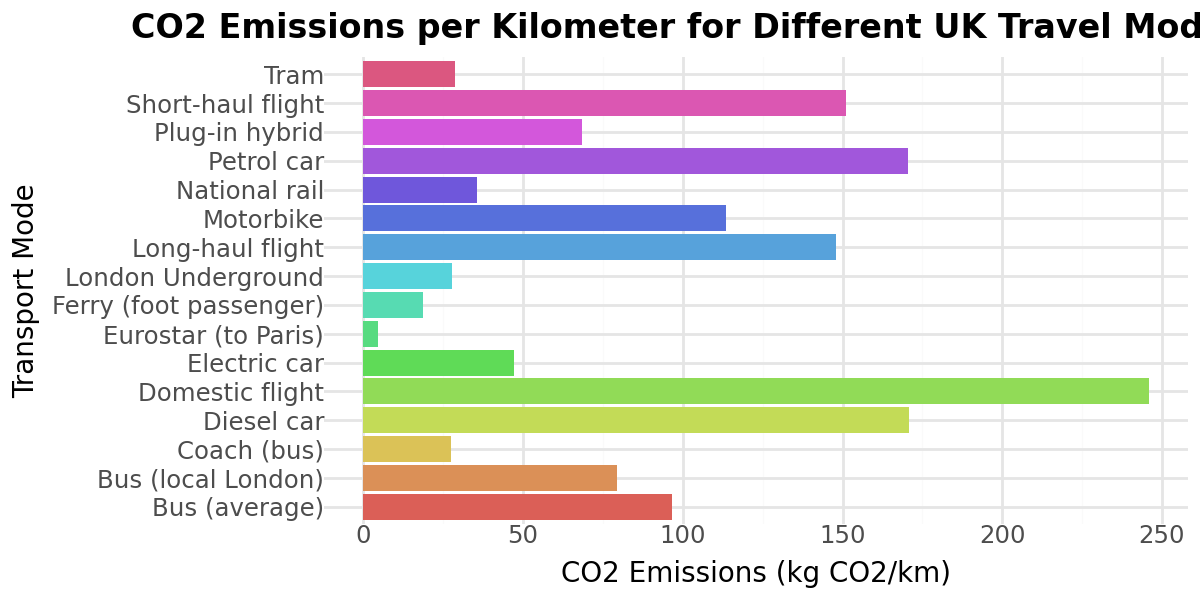

In [52]:
import pandas as pd
from plotnine import *

# Load the data
uk = pd.read_csv("/content/uk_2022.csv")

# Create the bar plot
(
    ggplot(df, aes(x='Entity', y='Transport emissions per kilometer travelled', fill='Entity'))
    + geom_bar(stat='identity')
    + labs(
        title='CO2 Emissions per Kilometer for Different UK Travel Modes (2022)',
        x='Transport Mode',
        y='CO2 Emissions (kg CO2/km)'
    )
    + theme_minimal()
    + theme(
      figure_size=(6, 3),
      plot_title=element_text(size=12, weight='bold'),
      axis_title=element_text(size=10),
      legend_title=element_text(size=8),
      legend_text=element_text(size=8)
    )
    + coord_flip()
    + theme(legend_position='none')
)

## Research Questions and Models



### 1. The Impact of Planes and Heavy Duty Vehicles

Research Question: How much emission would there be in 2030 if we reduced usage of Aviation and Freight Vehicles?

Preliminary Results:

The preliminary results indicate a significant reduction in emissions by 2030 if road freight vehicles and aviation usage are reduced. Under the baseline scenario, total emissions in 2030 are projected to be 7.33 gigatonnes. However, with the proposed policy scenario of reducing road freight vehicle emissions by 20% and aviation by 15%, total emissions are expected to drop substantially to 2.58 gigatonnes. This reduction highlights the potential of targeting high-emission transport modes like road freight and aviation to achieve significant emissions reductions in the transportation sector by 2030.

In [ ]:
# Load the dataset
transport = pd.read_csv('/content/emission_predictions.csv')

# Strip whitespace from column names
transport.columns = transport.columns.str.strip()

# Step 1: Data Preparation
# Recalculate total emissions to ensure consistency
transport['TotalEmissions'] = transport[['Passenger road vehicles',
                                          'Aviation',
                                          'Road freight vehicles',
                                          'Rail',
                                          'Shipping',
                                          'Other']].sum(axis=1)

# Filter relevant columns
X = transport[['Year']]
modes = ['Passenger road vehicles', 'Aviation', 'Road freight vehicles', 'Rail', 'Shipping', 'Other']

# Step 2: Fit Linear Regression for Each Mode
mode_projections = {}
for mode in modes:
    # Prepare data
    y = transport[mode]

    # Fit linear regression model
    lr = LinearRegression()
    lr.fit(X, y)

    # Predict future emissions (e.g., 2031–2040)
    future_years = pd.DataFrame({'Year': np.arange(2031, 2041)})
    predictions = lr.predict(future_years)

    # Store results
    mode_projections[mode] = {
        'model': lr,
        'predictions': predictions,
        'future_years': future_years['Year']
    }

# Step 4: Highlight Policy Variables and Next Steps
# Example: Simulating a reduction in emissions for road freight and aviation
policy_simulation = transport[['Year', 'TotalEmissions']].copy()
policy_simulation['Road freight vehicles'] = transport['Road freight vehicles'] * 0.8  # Reduce by 20%
policy_simulation['Aviation'] = transport['Aviation'] * 0.85  # Reduce by 15%

# Calculate the new total emissions under the policy scenario
policy_simulation['NewTotalEmissions'] = policy_simulation[['Road freight vehicles', 'Aviation']].sum(axis=1)

# Compare total emissions before and after the policy
print("Baseline Total Emissions (2030):", transport['TotalEmissions'].iloc[-1])
print("Policy Total Emissions (2030):", policy_simulation['NewTotalEmissions'].iloc[-1])

Baseline Total Emissions (2030): 7.325545654
Policy Total Emissions (2030): 2.57640375565


### 2. Impact of Transitioning to Low-Emission Options
Research Question: How could shifting to low-emission transport modes reduce overall emissions by 2030?

Preliminary Results:

This study examines the potential emissions reductions from transitioning to low-emission transport modes, including increased adoption of electric vehicles (EVs) and public transit. Our baseline model estimates global transportation emissions at 7.33 gigatonnes of CO2. However, under the proposed transition scenario, emissions decrease to 6.92 gigatonnes, resulting in a reduction of 0.41 gigatonnes. These findings demonstrate the significant impact of shifting to EVs and public transit as effective strategies for reducing emissions by 2030. By prioritizing low-emission alternatives, this policy shift could play a pivotal role in meeting future environmental targets.

In [ ]:

# Reload the dataset to ensure the correct context
transport = pd.read_csv('/content/emission_predictions.csv')

# Recalculate total emissions to ensure consistency
transport['TotalEmissions'] = transport[[' Passenger road vehicles',
                                          ' Aviation',
                                          ' Road freight vehicles',
                                          ' Rail',
                                          ' Shipping',
                                          ' Other']].sum(axis=1)

# Prepare the data for linear regression
X = transport[[' Passenger road vehicles',
                ' Aviation',
                ' Road freight vehicles',
                ' Rail',
                ' Shipping',
                ' Other']]
y = transport['TotalEmissions']

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Create a counterfactual scenario
scenario = X.copy()
scenario[' Road freight vehicles'] *= 0.8  # Reduce road freight emissions by 20%
scenario[' Aviation'] *= 0.85  # Reduce aviation emissions by 15%
scenario[' Rail'] *= 1.3  # Increase rail emissions by 30%
scenario[' Shipping'] *= 1.2  # Increase shipping emissions by 20%

# Predict total emissions for the counterfactual scenario
scenario_emissions = lr.predict(scenario)

# Baseline emissions
baseline_emissions = y.iloc[-1]

# Emission reduction
emission_reduction = baseline_emissions - scenario_emissions[-1]

# Output results
print(f"Baseline Emissions (Gigatonnes): {baseline_emissions:.2f}")
print(f"Scenario Emissions (Gigatonnes): {scenario_emissions[-1]:.2f}")
print(f"Reduction in Emissions (Gigatonnes): {emission_reduction:.2f}")

Baseline Emissions (Gigatonnes): 7.33
Scenario Emissions (Gigatonnes): 6.92
Reduction in Emissions (Gigatonnes): 0.41


### 3. UK Policy Changes’ Impact on Emissions by 2030

Research Question: How would UK-specific policy changes affect transportation emissions?



Preliminary Results:

This study evaluates how UK-specific policy changes, including a 20% reduction in car usage and a 50% increase in electric rental bike usage, would impact transportation emissions by 2030. Our findings indicate that under a business-as-usual (BAU) scenario, the UK's transportation emissions would reach 9.37 million metric tons (MT) of CO2. However, with the proposed policy scenario, emissions could decrease to 8.62 MT CO2, resulting in an 8.04% reduction. These results highlight the potential of promoting cycling and reducing car use as effective tools for emissions reduction.

The policy scenario has a more significant impact on passenger road vehicles, which are the largest source of emissions in the transportation sector. While other modes such as aviation and shipping show more moderate reductions, the adoption of cycling for short trips leads to a meaningful shift in emissions. By 2030, passenger road vehicles will see a reduction in their emissions share from 11.92% to 10.91%. These findings underscore the importance of encouraging modal shifts in transportation to achieve emission reduction goals.


In [ ]:
# Calculate emissions in 2030 under both scenarios
emissions_2030_ba = projected_global.loc[projected_global['Year'] == 2030, 'Total Emissions'].values[0]
emissions_2030_policy = policy_scenario.loc[policy_scenario['Year'] == 2030, 'Total Emissions'].values[0]
reduction = ((emissions_2030_ba - emissions_2030_policy) / emissions_2030_ba) * 100

# Display results
print(f"Projected emissions in 2030 (Business-as-Usual): {emissions_2030_ba:.2f} MT CO2")
print(f"Projected emissions in 2030 (Policy Scenario): {emissions_2030_policy:.2f} MT CO2")
print(f"Percentage reduction in emissions: {reduction:.2f}%")


Projected emissions in 2030 (Business-as-Usual): 9.37 MT CO2
Projected emissions in 2030 (Policy Scenario): 8.62 MT CO2
Percentage reduction in emissions: 8.04%


## Model Usage
**1. Current and Projected Emissions by Transport Mode**

Model 1 reveals that reducing road freight vehicles by 20% and aviation by 15% could significantly decrease global emissions, from 7.33 gigatonnes to 2.58 gigatonnes in 2030. SMART can use these findings to advocate for policies targeting these high-emission sectors, such as promoting alternative freight solutions and encouraging the adoption of low-emission aviation technologies. The model’s predictive ability will help SMART guide cities toward more efficient and sustainable transportation systems, with an emphasis on reducing emissions from key sources. However, SMART should consider the ethical implications of such changes, ensuring that they are implemented in an equitable manner, protecting vulnerable communities and workers who may be impacted by these shifts. The model’s results highlight the importance of data-driven decisions for reducing transportation emissions while also addressing broader social and economic concerns.

**2. Impact of Transitioning to Low-Emission Options**

Model 2 shows that shifting to low-emission transport modes, like rail and shipping, could reduce global emissions by about 0.4 gigatonnes, emphasizing the transformative potential of such changes. It also highlights the need to explore other low-emission options like cycling and electrification. SMART can use these results to advocate for policy shifts towards low-emission transport, supporting investments in infrastructure such as rail networks, electric vehicle charging stations, and cycling paths. The models provide data-driven insights to inform SMART's efforts to promote effective, environmentally responsible policies for reducing transportation emissions.

**3. Impact of Implementing a Policy to Promote Electric Rental Bike Usage**

The results in Model 3 show that less car usage and more electric bike usage should reduce emissions by around 8% by 2030 in the UK. SMART can leverage these results to advocate for policies such as expanded cycling infrastructure, urban redesigns, and incentives to reduce car usage. The predictive ability of this model can guide future planning and inform decisions on how best to prioritize emission-reducing strategies. However, further investment in infrastructure and refining assumptions about cycling adoption will be essential for achieving the full potential of these emissions reductions. Ethically, it is crucial that these policies are implemented equitably, ensuring access to cycling infrastructure for all demographics. Additionally, safety measures should be prioritized to ensure that the transition to cycling does not inadvertently disadvantage certain groups. Transparent communication of these assumptions is key for stakeholder engagement and accountability in the policy-making process.